## chapter 02 Linear Regression

- 2.1 simple linear regression 一元线性回归
- 2.2 multiple linear regression 多元线性回归
- 2.3 polynomial regression 多项式回归
- 2.4 how to train models & cost function

### 2.1 simple linear regression 一元线性回归

In [1]:
# load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

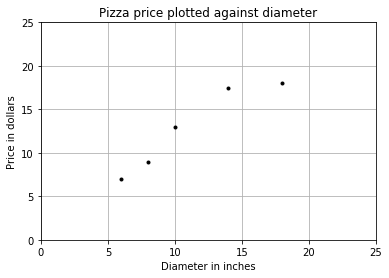

In [3]:
# plot X and y
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [4]:
# Linear regression model
from sklearn.linear_model import LinearRegression
# 初始化
lrg = LinearRegression()
# 训练
lrg.fit(X, y)
# 预测
lrg.predict([12])
print('A 12" pizza should cost: $%.2f' % lrg.predict([12])[0])

A 12" pizza should cost: $13.68


d:\application\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
d:\application\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [5]:
# evaluating the fitness of model using cost function
## cost function, loss function
## residuals or training errors
## prediction errors or test errors
## residual sum of squares
print('Residual sum of squares: %.2f' % np.mean((lrg.predict(X) - y) ** 2))

Residual sum of squares: 1.75


In [7]:
# variance 
var_x = np.var([6, 8, 10, 14, 18], ddof = 1)
print('var_x =', var_x)
# covariance
cov_xy = np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]
print('cov_xy =', cov_xy)
# β = cov_xy / var_x
beta = cov_xy / var_x
print(beta)
# α = ybar - β * xbar
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
alpha = ybar - beta * xbar
print(alpha)
# model
# y = 1.9655 + 0.9763 * x
print('if x = 11, then y = ', 1.9655 + 0.9763 * 11)

var_x = 23.2
cov_xy = 22.65
0.976293103448
1.96551724138
if x = 11, then y =  12.7048


In [14]:
# Evaluating model
# test dataset
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
# R-squared
y_test_bar = (11 + 8.5 + 15 + 18 + 11) / 5    # 12.7
ss_total = (11 - 12.7)**2 + (8.5 - 12.7)**2 + (15 - 12.7)**2 + (18 - 12.7)**2 + (11 - 12.7)**2
print('ss_total = ', ss_total)
fx1 = 1.9655 + 0.9763 * X_test[0][0]
fx2 = 1.9655 + 0.9763 * X_test[1][0]
fx3 = 1.9655 + 0.9763 * X_test[2][0]
fx4 = 1.9655 + 0.9763 * X_test[3][0]
fx5 = 1.9655 + 0.9763 * X_test[4][0]
ss_res = (11 - fx1)**2 + (8.5 - fx2)**2 + (15 - fx3)**2 + (18 - fx4)**2 + (11 - fx5)**2
print('ss_res = ', ss_res)
R_squared = 1 - ss_res / ss_total
print('R-squared = ', R_squared)

ss_total =  56.8
ss_res =  19.198213589999995
R-squared =  0.6620032818661973


In [16]:
# modeling using scikit-learn
# evaluating model performance with R-squared
lrg.score(X_test,  y_test)

0.6620052929422553

### 2.2 multiple linear regression 多元线性回归

In [1]:
# load pacakges
from sklearn.linear_model import LinearRegression
# prepare data
X_train = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
# modeling
lrg = LinearRegression()
lrg.fit(X_train, y_train)
# prediction
predictions = lrg.predict(X_test)
# evaluate model
print('R-squared = ', lrg.score(X_test, y_test))

R-squared =  0.770167773132


In [5]:
for i, prediction in enumerate(predictions):
    print('Predicted:%s, Target:%s' % (prediction, y_test[i]))

Predicted:[ 10.0625], Target:[11]
Predicted:[ 10.28125], Target:[8.5]
Predicted:[ 13.09375], Target:[15]
Predicted:[ 18.14583333], Target:[18]
Predicted:[ 13.3125], Target:[11]


### 2.3 polynomial regression 多项式回归

In [15]:
# load packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

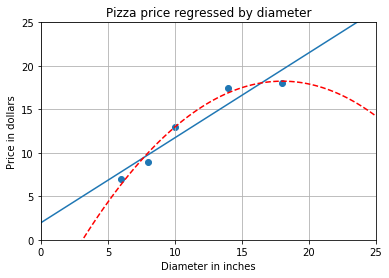

In [12]:
# prepare data
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

# simple linear modeling
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))

# plot
plt.plot(xx, yy)

# quadratic_featurizer
# 通过PolynomialFeatures获得二次的特征，degree = 2
quadratic_featurizer = PolynomialFeatures(degree = 2)
# 把训练集转换成二次特征
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
# 把测试集转换成二次特征
X_test_quadratic = quadratic_featurizer.transform(X_test)
# regressor_quadratic
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

# plot 
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 
         c = 'r', 
         linestyle = '--')
plt.title('Pizza price regressed by diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25,0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [13]:
# evaluating model
print('simple linear regression model R-squared:', regressor.score(X_test, y_test))
print('quadratic regression R-squared:', regressor_quadratic.score(X_test_quadratic, y_test))

simple linear regression model R-squared: 0.809726797708
quadratic regression R-squared: 0.867544365635


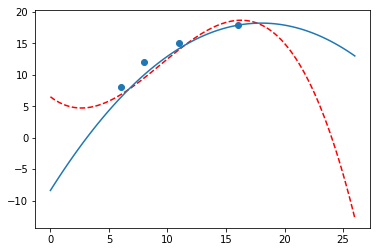

cubic linear regression R-squared: 0.835692415604


In [25]:
# 可以增加次数，看看效果如何
cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)

# modeling
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)

# plot
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic), 
         c = 'r', 
         linestyle = '--')
plt.plot(xx, regressor_quadratic.predict(xx_quadratic))
plt.scatter(X_test, y_test)
plt.show()

# evaluating model
print('cubic linear regression R-squared:', regressor_cubic.score(X_test_cubic, y_test))
# 发现三次的模型的效果不如二次

### 2.4 how to train models & cost function